In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
# load data
r_data = pd.read_csv("../result/join_weather_flower/Rose_C0H960_草屯.csv")
r_data = r_data.dropna()
# select year
# gb_df  = r_data.groupby("year")
# r_data = gb_df.get_group(2014.0)
# print(r_data)
r_data = r_data.reset_index()
r_data = r_data.drop(columns="index")
r_data["d_temp"] = r_data['T.Max'] - r_data['T.Min']
d = np.array(r_data["Date"])
day_new=[]
for date in d:
    day_new.append(int(date.split("-")[-1]))
r_data["date_of_m"] = day_new
# r_data
tg = "avg_price"
col_x =  ['Temperature', 'T.Max', 'T.Min', 'Precp', 
          'RH', 'StnPres', 'WS', 'WSGust', "year",
          "week","d_temp","date_of_m"]
# rm "/"
for col in col_x:
    old = r_data[col]
    new = []
    for i in range(len(old)):
        try:
            new.append(float(old[i]))
            tmp = float(old[i])
        except ValueError:
            new.append(tmp)
    r_data[col] = new

x_raw = r_data[col_x]
y_raw = r_data[tg]

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_raw, 
                                                    y_raw, 
                                                    test_size=0.1)


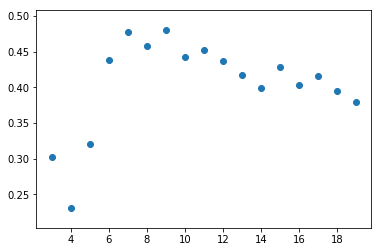

In [3]:
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import graphviz
from sklearn.tree import export_graphviz
r2_l = []
for k in range(3,20):
    reg = DecisionTreeRegressor(max_depth=k)
    # 訓練考古題
    reg.fit(x_train, y_train)
    g = export_graphviz(reg, feature_names=col_x, filled=True)
    result = graphviz.Source(g)
    # result.render("avg_price")
    pre = reg.predict(x_test)
    r2 =  r2_score(y_test, pre)
#     print("k:",k, "\t",r2)
    r2_l.append(r2)
# df_show = pd.DataFrame()
# df_show["pd"]= np.array(reg.predict(x_test))
# df_show["ans"] = np.array(y_test)
# df_show.to_csv("test0504ML.csv", index=False)
# df_show.corr()
# result
matplotlib.pyplot.scatter(range(3,20),r2_l)

In [4]:
reg = DecisionTreeRegressor(max_depth=7)
# 訓練考古題
reg.fit(x_train, y_train)
g = export_graphviz(reg, feature_names=col_x, filled=True)
result = graphviz.Source(g)
# result.render("avg_price")
pre = reg.predict(x_test)
r2 =  r2_score(y_test, pre)
print("k:",7, "\t",r2)
# r2_l.append(r2)
df_show = pd.DataFrame()
df_show["pd"]= np.array(reg.predict(x_test))
df_show["ans"] = np.array(y_test)
df_show.to_csv("test0504ML.csv", index=False)
df_show.corr()

k: 7 	 0.4740060576328907


,pd,ans
pd,1.00000,0.70709
ans,0.70709,1.00000


In [115]:
# (y_raw - min(y_raw)) // ((max(y_raw) - min(y_raw))/10)

0       4.0
1       4.0
2       4.0
3       3.0
4       4.0
5       3.0
6       3.0
7       4.0
8       4.0
9       3.0
10      3.0
11      3.0
12      3.0
13      3.0
14      3.0
15      3.0
16      3.0
17      3.0
18      3.0
19      3.0
20      3.0
21      3.0
22      4.0
23      4.0
24      3.0
25      4.0
26      4.0
27      5.0
28      3.0
29      1.0
       ... 
1686    1.0
1687    2.0
1688    2.0
1689    2.0
1690    1.0
1691    1.0
1692    1.0
1693    1.0
1694    1.0
1695    1.0
1696    1.0
1697    1.0
1698    1.0
1699    1.0
1700    1.0
1701    1.0
1702    1.0
1703    1.0
1704    1.0
1705    1.0
1706    1.0
1707    1.0
1708    2.0
1709    2.0
1710    2.0
1711    2.0
1712    1.0
1713    1.0
1714    1.0
1715    1.0
Name: avg_price, Length: 1716, dtype: float64

In [117]:
# class data
# TODO y > diff >classific / 2d
y_c5 = (y_raw - min(y_raw)) // ((max(y_raw) - min(y_raw))/5)
# test randomForest
xtrain, xtest, ytrain, ytest = train_test_split(x_drop, y_class, test_size=0.1)
np.bincount(y_c10)
# y_c10
# 第三種條法: 讓電腦幫我對所有參數都完成一次交叉驗證, 看一下哪組參數的結果最好
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(22, 26),
    "max_depth":range(2, 6)
}
clf = RandomForestClassifier()
g = GridSearchCV(clf, params, cv=10)
g.fit(x_raw, y_c5)
print(g.best_params_)
print(g.best_score_)

array([940, 665,  84,  22,   4,   1], dtype=int64)

In [119]:
# TODO y > diff >classific / 2d
y_diff = np.array(y_raw.pct_change())[1:]
x_drop = np.array(x_raw.drop(index=0))
# y_class =[]
# for i in len(y_diff):
# y_diff.describe()
# define new class 
y_class_range = [-0.1,0,0.1]
def c_class(v):
    t = 0
    y_class_range = [0]
    for i in range(len(y_class_range)):
        if (v >= y_class_range[i]):
            t = i+1
#     if v>0:
#         t = t+1
    return str(t)
# 0,       1  ,2     ,3,  4
# <-0.1,  <0, =0,  <0.1, >0.1
y_class = []
for i in range(len(y_diff)):
    y_class.append(c_class(y_diff[i]))
df_tmp = pd.DataFrame()
df_tmp["diff"] = y_diff
df_tmp["class"] = y_class
df_tmp
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_mtl = mlb.fit_transform(y_class)
# test randomForest
xtrain, xtest, ytrain, ytest = train_test_split(x_drop, y_class, test_size=0.1)
np.bincount(y_class)
# 第三種條法: 讓電腦幫我對所有參數都完成一次交叉驗證, 看一下哪組參數的結果最好
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(22, 26),
    "max_depth":range(2, 6)
}
clf = RandomForestClassifier()
g = GridSearchCV(clf, params, cv=10)
g.fit(x_drop, y_class)
print(g.best_params_)
print(g.best_score_)

{'max_depth': 4, 'n_estimators': 22}
0.5113702623906705


In [ ]:
# MLP test